In [1]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.utils import resample
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import seaborn as sn

Прочитаем данные и изучим их структуру

In [2]:
data=pd.read_csv('/content/hypothyroid.csv')
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Среди значений параметра `sex` есть значения `?`, которое указывает, что здесь данные пропущены.

Все столбцы имеют тип данных `object`, используем кодирование для получения численного представления признаков.

In [4]:
encoders = {}
for x in data.columns:
    encoders[x] = LabelEncoder().fit(data[x])
    data[x]= encoders[x].transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3772 non-null   int64
 1   sex                        3772 non-null   int64
 2   on thyroxine               3772 non-null   int64
 3   query on thyroxine         3772 non-null   int64
 4   on antithyroid medication  3772 non-null   int64
 5   sick                       3772 non-null   int64
 6   pregnant                   3772 non-null   int64
 7   thyroid surgery            3772 non-null   int64
 8   I131 treatment             3772 non-null   int64
 9   query hypothyroid          3772 non-null   int64
 10  query hyperthyroid         3772 non-null   int64
 11  lithium                    3772 non-null   int64
 12  goitre                     3772 non-null   int64
 13  tumor                      3772 non-null   int64
 14  hypopituitary           

In [5]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,34,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,1
1,15,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,1
2,40,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,1
3,67,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,1
4,67,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,1


### Удалим дубликаты из таблицы

In [6]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        3711 non-null   int64
 1   sex                        3711 non-null   int64
 2   on thyroxine               3711 non-null   int64
 3   query on thyroxine         3711 non-null   int64
 4   on antithyroid medication  3711 non-null   int64
 5   sick                       3711 non-null   int64
 6   pregnant                   3711 non-null   int64
 7   thyroid surgery            3711 non-null   int64
 8   I131 treatment             3711 non-null   int64
 9   query hypothyroid          3711 non-null   int64
 10  query hyperthyroid         3711 non-null   int64
 11  lithium                    3711 non-null   int64
 12  goitre                     3711 non-null   int64
 13  tumor                      3711 non-null   int64
 14  hypopituitary           

### Удаление аномалий


In [7]:
N_before = len(data)
numeric_features = ['age', 'TSH', 'T3', 'TT4', 'T4U','FTI', 'referral source']

#### Удаление аномальных значения из числовых столбцов методом IQR.

Метод IQR (Interquartile Range, межквартильный размах) — это статистический метод, используемый для определения наличия выбросов в наборе данных. IQR представляет собой мера разброса данных и вычисляется как разность между третьим квартилем (Q3) и первым квартилем (Q1) в упорядоченном наборе данных.

In [8]:
TRESHOLD_Q3 = 0.95
TRESHOLD_Q1 = 0.05

for column_name in numeric_features:
    Q3 = data[column_name].quantile(TRESHOLD_Q3)
    Q1 = data[column_name].quantile(TRESHOLD_Q1)
    print(f"{column_name} [Q1, Q3] : [{Q1}, {Q3}]")
    IQR = Q3 - Q1
    data_iqr = data[~((data[column_name] < Q1-0.1*IQR) | (data[column_name] > Q3+0.1*IQR))]
N_after = len(data_iqr)
print("{:.1f}% left".format((N_after/N_before)*100))

age [Q1, Q3] : [12.0, 77.0]
TSH [Q1, Q3] : [5.0, 287.0]
T3 [Q1, Q3] : [9.0, 69.0]
TT4 [Q1, Q3] : [4.0, 240.0]
T4U [Q1, Q3] : [31.0, 146.0]
FTI [Q1, Q3] : [3.0, 234.0]
referral source [Q1, Q3] : [1.0, 4.0]
97.0% left


После удаление выбросов у нас осталось 97 процентов данных.

#### Удаление аномальных значения из числовых столбцов методом 3 сигм

Правило 3 сигм, также известное как правило 68-95-99,7 или эмпирическое правило, представляет собой статистический метод обнаружения аномалий, предполагающий нормальное распределение данных. Он идентифицирует аномалии как точки данных, выходящие за пределы трех стандартных отклонений от среднего значения.

In [9]:
# Calculate the mean and standard deviation
mean = data[numeric_features].mean()
std = data[numeric_features].std()

# Set the threshold for anomaly detection
threshold = mean + 3 * std

data_3sigmas = data.copy()
data_3sigmas = data[data[numeric_features] <= threshold]

N_after = len(data_3sigmas)

print("{:.1f}% left".format((N_after/N_before)*100))

100.0% left


Метод 3 сигм не обнаружил выбросов

#### Удаление аномальных значения из числовых столбцов методом локального уровня выброса.

Локальный уровень выброса — алгоритм нахождения аномальных точек данных путём измерения локального отклонения данной точки с учётом её соседей

Локальный уровень выброса основывается на концепции локальной плотности, где локальность задаётся $k$-ближайшими соседями, расстояния до которых используются для оценки плотности. Путём сравнения локальной плотности объекта с локальной плотностью его соседей можно выделить области с аналогичной плотностью и точки, которые имеют существенно меньшую плотность, чем её соседи. Эти точки считаются выбросами.

Значение, примерно равное $1$, означает, что объект сравним с его соседями (а тогда он не является выбросом). Значение меньше $1$ означает плотную область (которая может быть внутренностью), а значения, существенно большие $1$, свидетельствуют о выбросах.

В sklearn:

"The higher, the more normal. Inliers tend to have a LOF score close to 1 (`negative_outlier_factor_` close to -1), while outliers tend to have a larger LOF score."

Определим пороговое значение с помощью квантиля $0.05$

In [10]:
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(data[numeric_features])

# Add the outlier scores to the dataframe
data_lof = data.copy()
data_lof['outlier_score'] = lof.negative_outlier_factor_

threshold = np.quantile(data_lof['outlier_score'], .05)
print(threshold)

data_lof = data_lof[data_lof['outlier_score'] > threshold]

N_after = len(data_lof)

print("{:.1f}% left".format((N_after/N_before)*100))

-1.5088040318968927
95.0% left


В результате эксперимента было выявленно, что наилучшие решение достигается при использовании IQR метода.

In [11]:
data = data_iqr

### Описательные статистики

In [12]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,...,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.0,3599.0,3599.000000,3599.000000
mean,47.207002,1.279244,0.126146,0.013893,0.010281,0.040845,0.007780,0.014171,0.016393,0.062795,...,0.953043,119.589886,0.909697,64.041123,0.910253,108.264240,0.0,0.0,3.369269,0.921089
std,20.700039,0.524115,0.332060,0.117062,0.100885,0.197958,0.087872,0.118210,0.127001,0.242628,...,0.211577,98.731198,0.286655,30.999282,0.285859,97.032604,0.0,0.0,0.947810,0.269637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000
25%,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,21.000000,1.000000,45.000000,1.000000,17.000000,0.0,0.0,3.000000,1.000000
50%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,79.000000,1.000000,57.000000,1.000000,55.000000,0.0,0.0,4.000000,1.000000
75%,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,226.000000,1.000000,70.000000,1.000000,221.000000,0.0,0.0,4.000000,1.000000
max,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,241.000000,1.000000,146.000000,1.000000,234.000000,0.0,0.0,4.000000,1.000000


Text(0.5, 1.0, '? F M')

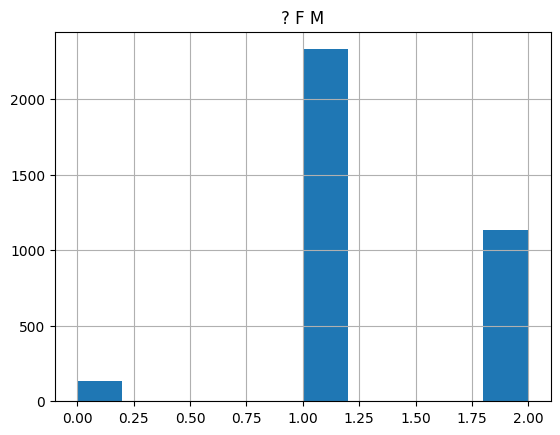

In [13]:
data['sex'].hist()
plt.title(' '.join(encoders['sex'].classes_))

женщин почти в два раза больше, чем мужчин

count    3599.000000
mean       47.207002
std        20.700039
min         0.000000
25%        29.000000
50%        50.000000
75%        64.000000
max        93.000000
Name: age, dtype: float64

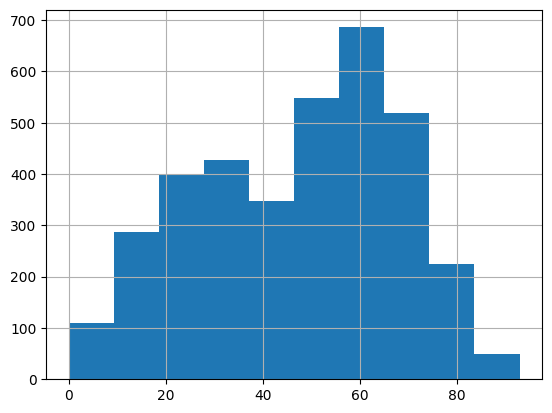

In [14]:
data['age'].hist()
data['age'].describe()

распределение возрастов похоже на нормальное со среднем 46.5 и стандратным отклонение 20.8

Text(0.5, 1.0, 'N P')

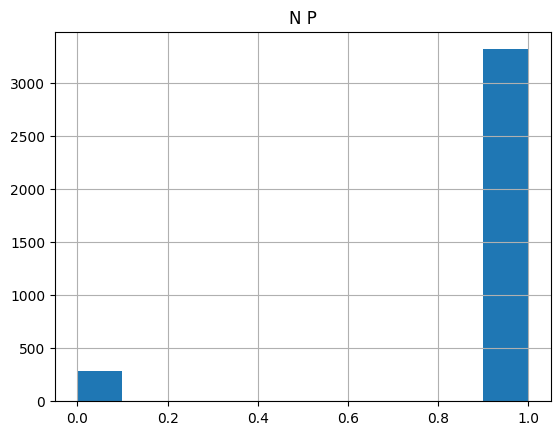

In [15]:
data['binaryClass'].hist()
plt.title(' '.join(encoders['binaryClass'].classes_))

### Визуализация матрицы корреляции числовых признаков

Heatmap для матрицы корреляции представляет собой визуализацию матрицы корреляции с использованием цветовых значений. Матрица корреляции - это таблица, которая показывает степень взаимосвязи между различными переменными. Каждая ячейка в матрице корреляции содержит значение корреляции между двумя переменными.

Heatmap использует цветовую шкалу, чтобы представить значения корреляции. Обычно в heatmap используется градиентная шкала от одного цвета до другого, где разные оттенки цветов соответствуют различным значениям корреляции. Например, более высокие значения корреляции могут быть представлены более яркими или более насыщенными цветами, тогда как более низкие значения корреляции могут быть представлены более бледными или менее насыщенными цветами.

Heatmap для матрицы корреляции позволяет визуально выявить структуру и силу взаимосвязей между переменными. Она может быть полезной для исследования данных, идентификации сильных или слабых связей между переменными и выявления паттернов или группировок в данных. Также heatmap может помочь при принятии решений о выборе переменных для анализа или моделирования, основываясь на их взаимосвязи с другими переменными.

<Axes: >

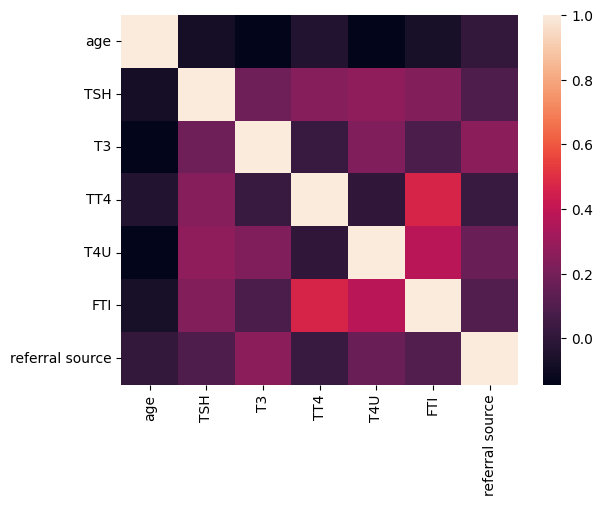

In [16]:
sn.heatmap(data[numeric_features].corr())

### Визуализация зависимостей сильно коррелирующих пар с распределением по целевым классам.

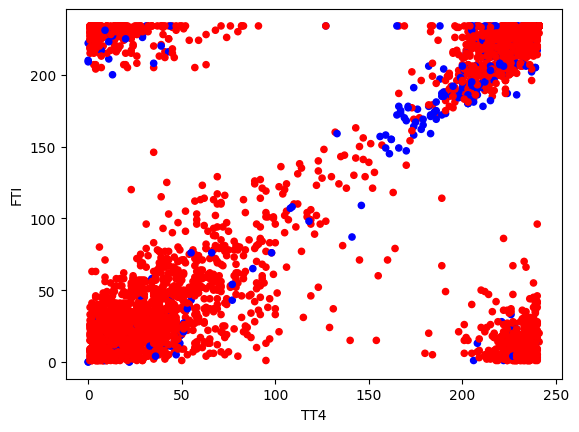

In [17]:
class_colors = ['blue' if class_label == 0 else 'red' for class_label in data['binaryClass']]
data.plot(kind='scatter', x='TT4', y='FTI', color=class_colors);

На графике можно наблюдать явную линеную зависимость между признакми `TT4` и `FTI`.

### Визуализация матрицы корреляции категориальных признаков

<Axes: >

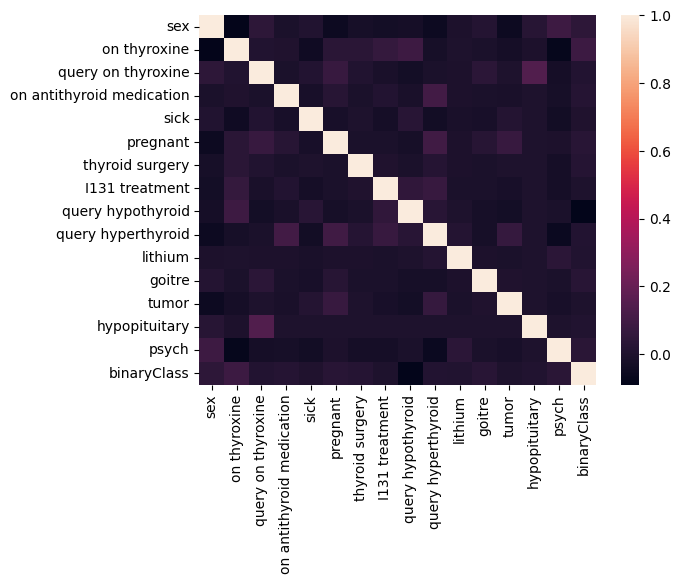

In [18]:
categorical_features = ['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych','binaryClass']

sn.heatmap(data[categorical_features].corr())

Категориальные признаки коррелируют незначительно

### Дуговая диаграмма признаков

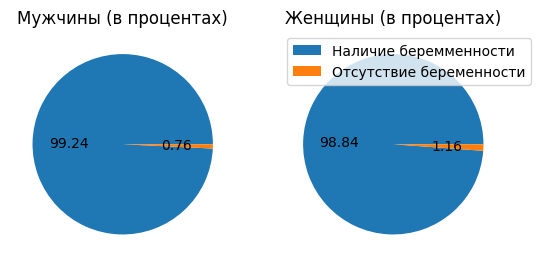

In [19]:
men_pregnant = len(data[(data.sex == 0) & (data.pregnant == 1)])
men_no_pregnant = len(data[(data.sex == 0) & (data.pregnant == 0)])

women_pregnant = len(data[(data.sex == 1) & (data.pregnant == 1)])
women_no_pregnant = len(data[(data.sex == 1) & (data.pregnant == 0)])

fig, axis = plt.subplots(1,2)

axis[0].pie([men_no_pregnant, men_pregnant], autopct='%.2f');
axis[0].set_title('Мужчины (в процентах)')

axis[1].pie([women_no_pregnant, women_pregnant], autopct='%.2f');
axis[1].set_title('Женщины (в процентах)')
axis[1].legend(['Наличие беремменности', 'Отсутствие беременности'], loc='upper left')

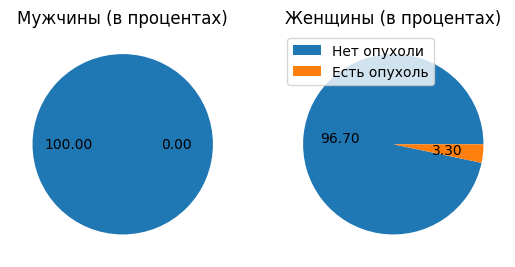

In [20]:
men_tumor = len(data[(data.sex == 0) & (data.tumor == 1)])
men_no_tumor = len(data[(data.sex == 0) & (data.tumor == 0)])

women_tumor = len(data[(data.sex == 1) & (data.tumor == 1)])
women_no_tumor = len(data[(data.sex == 1) & (data.tumor == 0)])

fig, axis = plt.subplots(1,2)

axis[0].pie([men_no_tumor, men_tumor], autopct='%.2f');
axis[0].set_title('Мужчины (в процентах)')

axis[1].pie([women_no_tumor, women_tumor], autopct='%.2f');
axis[1].set_title('Женщины (в процентах)')
axis[1].legend(['Нет опухоли', 'Есть опухоль'], loc='upper left');

В представленных данных, у женщин в два раза чаще встречается опухоль, чем у мужчин.

### Дисбаланс данных

Целевая переменная имеют значительный дисбаланс распределений. Данную проблему можно решить с помощью oversampling.

Oversampling в машинном обучении - это техника, которая используется для балансировки классов в задачах классификации, когда один класс представлен недостаточным количеством образцов по сравнению с другими классами. Oversampling состоит в увеличении числа образцов минорного класса (менее представленного класса) путем создания дубликатов или генерации новых образцов.

Основная цель oversampling - сделать распределение классов более сбалансированным и предотвратить проблемы, связанные с неравномерностью классов, такие как недообучение моделей или смещение в сторону доминирующего класса.

In [21]:
no = data[data.binaryClass == 0]
yes = data[data.binaryClass == 1]
no_oversampled = resample(no, replace=True, n_samples=len(yes), random_state=123)
data_oversampled = pd.concat([yes, no_oversampled])
data_oversampled['binaryClass'].value_counts()

1    3315
0    3315
Name: binaryClass, dtype: int64

### Нормализация данных

Нормализуем численные переменные.

In [22]:
features_to_normalize = ['age', 'TT4', 'T4U', 'FTI']

for feature in features_to_normalize:
  data_oversampled['age']=(data_oversampled['age']-\
                           data_oversampled['age'].min())/(data_oversampled['age'].max()-data_oversampled['age'].min())


In [23]:
data_oversampled.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,0.365591,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,1
1,0.161290,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,1
2,0.430108,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,1
3,0.720430,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,1
4,0.720430,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,1


### Модели класстеризации

In [24]:
# Выделяем признаки и целевую переменную
X = data_oversampled.drop(columns=['binaryClass'])
y = data_oversampled['binaryClass'].values

#### Метод k-средних

Мы начнем исследование моделей класстеризации с наиболее популярного алгоритма -- метод k-средних.

Основная идея данного алгоритма заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

In [25]:
# Определить область определения сетки гиперпараметров
params_domain = {
    'n_init': [5, 10, 15],
    'init': ['k-means++', 'random'],
    'algorithm': ["lloyd", "elkan"]
}

# Делаем сетку гиперпараметров декартовым произведением
params_grid = list(product(
             params_domain['n_init'],
             params_domain['init'],
             params_domain['algorithm'])
)

record_silhouette_avg = -1

for param_grid_item in params_grid:

  # Обучение класстеризации
  kmeans = KMeans(n_clusters=2, n_init = param_grid_item[0],
                  init=param_grid_item[1],
                  algorithm=param_grid_item[2]
                  )
  y_hat = kmeans.fit_predict(X)

  # Получение метрики silhouette для полученных кластеров
  silhouette_avg = silhouette_score(X, kmeans.labels_)
  if silhouette_avg > record_silhouette_avg:
    record_silhouette_avg = silhouette_avg
    best_params = param_grid_item

print("Лучший silhouette score {:.2f}, лучшие параметры: n_init={}, init={}, algorithm={}".format(record_silhouette_avg, *best_params))

Лучший silhouette score 0.43, лучшие параметры: n_init=5, init=k-means++, algorithm=lloyd


Таким образом, точность алгоритма kmeans составляет $66$ процентов, а метрика silhouette -- $0.42$

#### Метод иерархической кластеризации

Следующий алгоритм для исследования -- иерархическая кластеризация. Иерархическая кластеризация (также графовые алгоритмы кластеризации и иерархический кластерный анализ) — совокупность алгоритмов упорядочивания данных, направленных на создание иерархии (дерева) вложенных кластеров.

Мы будем исследовать класс методов иерархическая кластеризации, которые называются агломеративные методы. Данные методы заключаются в том, что новые кластеры создаются путем объединения более мелких кластеров и, таким образом, дерево создается от листьев к стволу;

In [26]:
# Определить область определения сетки гиперпараметров
params_domain = {
    'metric': ["l1", "l2", "cosine"],
    'compute_full_tree': [True, False],
    'linkage': ["complete", "average", "single"]
}

# Делаем сетку гиперпараметров декартовым произведением
params_grid = list(product(
             params_domain['metric'],
             params_domain['compute_full_tree'],
             params_domain['linkage'])
)

record_silhouette_avg = -1

for param_grid_item in params_grid:

  # Обучение класстеризации
  agg_clustering = AgglomerativeClustering(n_clusters=2, metric=param_grid_item[0],
                                           compute_full_tree=param_grid_item[1],
                                           linkage=param_grid_item[2])

  y_hat = agg_clustering.fit_predict(X)

  # Получение метрики silhouette для полученных кластеров
  silhouette_avg = silhouette_score(X, agg_clustering.labels_)
  if silhouette_avg > record_silhouette_avg:
    record_silhouette_avg = silhouette_avg
    best_params = param_grid_item

print("Лучший silhouette score {:.2f}, лучшие параметры: metric={}, compute_full_tree={}, linkage={}".format(record_silhouette_avg, *best_params))

Лучший silhouette score 0.42, лучшие параметры: metric=l1, compute_full_tree=True, linkage=complete


Таким образом, точность алгоритма иерархической класстеризации составляет $33$ процентов, а метрика silhouette -- $0.41$

#### Алгоритм сдвига среднего значения (англ. mean shift).

Данный алгоритм позволяет найти локальные максимумы функции плотности вероятности, представленной набором данных.

Алгоритм сдвига среднего значения начинается с случайного выбора точки в пространстве данных. Затем он вычисляет среднее значение всех точек в некотором окрестности выбранной точки и сдвигает выбранную точку в направлении найденного среднего значения. Процесс повторяется, пока выбранная точка не стабилизируется в локальном максимуме плотности или до достижения определенного критерия остановки.

Основная идея алгоритма заключается в том, чтобы сдвигать точку в сторону увеличения плотности данных, что приводит к сжатию кластеров и устранению шума. В результате получается набор точек, сосредоточенных вокруг локальных максимумов плотности, что позволяет идентифицировать различные кластеры или пики в данных.

In [27]:
# Определить область определения сетки гиперпараметров
params_domain = {
    'max_iter': range(300, 1000, 100),
}

# Делаем сетку гиперпараметров декартовым произведением
params_grid = list(product(
             params_domain['max_iter']
)
)

record_silhouette_avg = -1

for param_grid_item in params_grid:

  # Обучение класстеризации
  meanshift_clustering = MeanShift(max_iter=param_grid_item[0])
  y_hat = meanshift_clustering.fit_predict(X)

  # Получение метрики silhouette для полученных кластеров
  silhouette_avg = silhouette_score(X, meanshift_clustering.labels_)
  if silhouette_avg > record_silhouette_avg:
    record_silhouette_avg = silhouette_avg
    best_params = param_grid_item

print("Лучший silhouette score {:.2f}, лучшие параметры: max_iter={}".format(record_silhouette_avg, *best_params))

Лучший silhouette score 0.41, лучшие параметры: max_iter=300


#### Алгоритм DBSCAN

Основанная на плотности пространственная кластеризация для приложений с шумами (англ. Density-based spatial clustering of applications with noise, DBSCAN) — это алгоритм кластеризации, основанный на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).

In [28]:
# Определить область определения сетки гиперпараметров
params_domain = {
    'eps': [0.5, 0.7, 0.9],
    "min_samples": range(5, 12, 2),
    "algorithm": ["ball_tree", "kd_tree", "brute"],
}

# Делаем сетку гиперпараметров декартовым произведением
params_grid = list(product(
             params_domain['eps'],
             params_domain['min_samples'],
             params_domain['algorithm']
)
)

record_silhouette_avg = -1

for param_grid_item in params_grid:

  # Обучение класстеризации
  dbscan = DBSCAN(eps=param_grid_item[0],
                  min_samples=param_grid_item[1],
                  algorithm=param_grid_item[2])
  y_hat = dbscan.fit_predict(X)

  # Получение метрики silhouette для полученных кластеров
  silhouette_avg = silhouette_score(X, dbscan.labels_)
  if silhouette_avg > record_silhouette_avg:
    record_silhouette_avg = silhouette_avg
    best_params = param_grid_item

print("Лучший silhouette score {:.2f}, лучшие параметры: eps={}, min_samples={}, algorithm={}".format(record_silhouette_avg, *best_params))

Лучший silhouette score 0.14, лучшие параметры: eps=0.5, min_samples=5, algorithm=ball_tree


DBSCAN предсказывает слишком много кластеров:

In [29]:
len(set(y_hat))

177

#### Вывод

Таким образом, лучший silhouette score равный $0.43$ был достигнут с помощью метода kmeans с параметрами: `n_init=5, init=k-means++, algorithm=lloyd`

In [30]:
kmeans = KMeans(n_clusters=2, n_init = 5,
                  init="k-means++",
                  algorithm="lloyd"
                  )
y_hat = kmeans.fit_predict(X)

### Интерпретация кластеров

Рассмотрим описательные статистики некоторых признаков, которые можно интерпретировать, для класстеров, полученные лучшим алгоритмом.

In [31]:
X.iloc[np.where(y_hat == 1)][['age', 'sex', 'on thyroxine']].describe()

,age,sex,on thyroxine
count,2946.000000,2946.000000,2946.000000
mean,0.515830,1.289206,0.120842
std,0.220843,0.512525,0.325999
min,0.000000,0.000000,0.000000
25%,0.322581,1.000000,0.000000
50%,0.548387,1.000000,0.000000
75%,0.688172,2.000000,0.000000
max,1.000000,2.000000,1.000000


In [32]:
X.iloc[np.where(y_hat == 0)][['age', 'sex', 'on thyroxine']].describe()

,age,sex,on thyroxine
count,3684.000000,3684.000000,3684.000000
mean,0.501497,1.216884,0.051303
std,0.218191,0.489840,0.220645
min,0.000000,0.000000,0.000000
25%,0.311828,1.000000,0.000000
50%,0.537634,1.000000,0.000000
75%,0.677419,2.000000,0.000000
max,0.978495,2.000000,1.000000


Как можно видеть средние значение признака `on thyroxine` более чем в два раза больше у кластера `1`, чем у кластера `0`. Т.е. прием тироксина (thyroxine) оказывает значительное влияение на кластеризацию.

Основной функцией тироксина является активация процессов метаболизма, которая осуществляется через стимуляцию синтеза РНК и соответствующих белков. Тироксин влияет на обмен веществ, повышает температуру тела, контролирует рост и развитие организма, увеличивает синтез белков и чувствительность к катехоламинам, увеличивает частоту сердечных сокращений, утолщает слизистую оболочку матки. Усиливает окислительные процессы в клетках всего организма, в частности и клетках мозга. Тироксин важен для надлежащего развития и дифференцировки всех клеток человеческого тела, также может стимулировать метаболизм витаминов.